In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [2]:
seq_model = tf.keras.Sequential()

seq_model = Sequential([
  Flatten(input_shape=(3, 3), name='flatten_layer'),
  Dense(16, activation='relu', name='input_layer1'),
  Dense(32, activation='relu', name='hidden_layer'),
  Dense(4, activation='relu', name='output_layer'),
])

input_data = tf.ones((16, 3, 3))\

output = seq_model(input_data)
print(output)

tf.Tensor(
[[0.5793754  0.25956368 0.2024716  0.06716357]
 [0.5793754  0.25956368 0.2024716  0.06716357]
 [0.5793754  0.25956368 0.2024716  0.06716357]
 [0.5793754  0.25956368 0.2024716  0.06716357]
 [0.5793754  0.25956368 0.2024716  0.06716357]
 [0.5793754  0.25956368 0.2024716  0.06716357]
 [0.5793754  0.25956368 0.2024716  0.06716357]
 [0.5793754  0.25956368 0.2024716  0.06716357]
 [0.5793754  0.25956368 0.2024716  0.06716357]
 [0.5793754  0.25956368 0.2024716  0.06716357]
 [0.5793754  0.25956368 0.2024716  0.06716357]
 [0.5793754  0.25956368 0.2024716  0.06716357]
 [0.5793754  0.25956368 0.2024716  0.06716357]
 [0.5793754  0.25956368 0.2024716  0.06716357]
 [0.5793754  0.25956368 0.2024716  0.06716357]
 [0.5793754  0.25956368 0.2024716  0.06716357]], shape=(16, 4), dtype=float32)


c:\Projekty\kodilla\modul_18\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

# wydobycie obrazów oraz labelek
images, labels = train

# normalizacja wartości pikseli (maks. wartość
# wynosi 255.0, czyli aby znormalizować nasze dane,
# musimy podzielić każdy piksel przez maks. wartość)
images = images/255.0

# zapisujemy dane jako int
labels = labels.astype(np.int32)

In [4]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1)

# stworzenie zbioru typu Dataset z naszej listy
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# ustawienie batch_size na 32 oraz przetasowanie na bazie 1000 próbek
train_ds = train_ds.shuffle(1000).batch(32)

In [5]:
import pandas as pd

labelsSS = pd.Series(labels)
labelsSS.unique()

array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=int32)

In [6]:
f_mnist_model = tf.keras.Sequential([
    # spłaszczanie obrazka do wektora jednowymiarowego
    Flatten(input_shape=(28, 28)),

    Dense(450, activation='relu'),
    Dense(200, activation='mish'),
    Dense(100, activation='relu'),

    # ostatnia warstwa posiada tyle neuronów ile mamy klas
    Dense(10, activation='softmax')
])

f_mnist_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 450)            │       353,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        90,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 464,560 (1.77 MB)

 Trainable params: 464,560 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
def exponential_decay_fn(epoch, current_lr):
  return current_lr * 1**(epoch / 10)

In [11]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
f_mnist_model.compile(
  optimizer=adam_optimizer,
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
train_stats = f_mnist_model.fit(
  train_ds, # bo to dataset
  verbose=1,
  epochs=10,
  callbacks=[
    tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
  ]
  # validation_split=0.1
  # validation_data=(X_test, y_test)
)

Epoch 1/10
1446/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8915 - loss: 0.2888

KeyboardInterrupt: 

: 

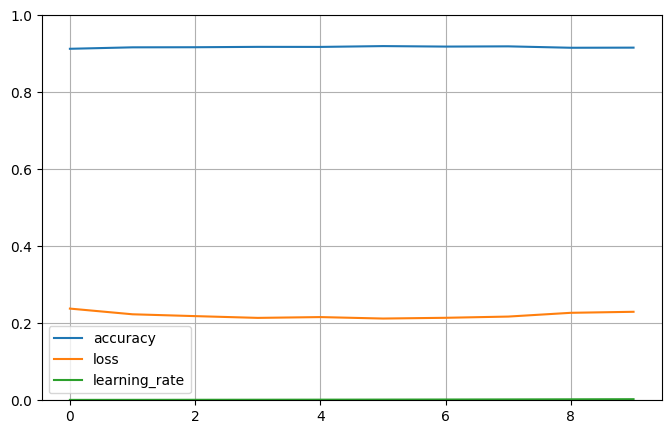

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(train_stats.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
y_pred = f_mnist_model.predict(X_test)
print("probs : ", y_pred[2])
print("klasa :", np.argmax(y_pred[2]))
print("rzeczywista klasa: ", y_test[2])

"""
probs :  [4.0548810e-15 1.0000000e+00 9.3477974e-17 5.3090128e-13 7.5702587e-15
 5.9295928e-25 2.1536054e-11 3.4459677e-24 2.8725664e-16 2.4974258e-22]
klasa : 1
rzeczywista klasa:  1
"""

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
probs :  [6.4921380e-07 2.3164648e-06 5.8151549e-03 2.6274978e-03 9.9018693e-01
 7.2211150e-13 1.3669686e-03 8.1375410e-12 5.0112936e-07 5.4890991e-11]
klasa : 4
rzeczywista klasa:  4


'\nprobs :  [4.0548810e-15 1.0000000e+00 9.3477974e-17 5.3090128e-13 7.5702587e-15\n 5.9295928e-25 2.1536054e-11 3.4459677e-24 2.8725664e-16 2.4974258e-22]\nklasa : 1\nrzeczywista klasa:  1\n'

In [12]:

print("probs : ", y_pred[3])
print("klasa :", np.argmax(y_pred[3]))
print("rzeczywista klasa: ", y_test[3])

probs :  [1.9732437e-25 0.0000000e+00 3.9195044e-26 3.5899311e-31 2.6436693e-23
 1.0000000e+00 5.6292744e-25 2.5539930e-27 2.7590810e-28 6.6025046e-27]
klasa : 5
rzeczywista klasa:  5


In [13]:
# stworzenie wejścia
from tensorflow.keras.layers import Flatten, Dense, Concatenate

input = tf.keras.Input(shape=X_train.shape[1:])

# możemy wypisać, co ta warstwa przyjmuje - jest to rozmiar
# naszego obrazka bez batch_size (który ma wartość None)
print(input)

# spłaszczenie wejścia
input_flat = Flatten(input_shape=[28,28])(input)

# nasza kolejna warstwa jest typu Dense, jak poprzednio, ale od razu
# i bezpośrednio przekazujemy jej wejście, tak jak funkcji w Pythonie:
hidden_1 = Dense(320, activation='relu', name="hidden_1")(input_flat)
hidden_2 = Dense(150, activation='relu', name="hidden_2")(hidden_1)

# złączamy wyniki z obu warstw za pomocą warstwy typu Concatenate
concat_layer = Concatenate()([input_flat, hidden_2])
output = Dense(10, activation='softmax')(concat_layer)

# tworzymy model, przekazując mu co ma być naszymi wyjściami, a co wejściami
model_res = tf.keras.Model(inputs=[input], outputs=[output])

# podsumowanie naszego modelu
model_res.summary()

<KerasTensor shape=(None, 28, 28), dtype=float32, sparse=False, ragged=False, name=keras_tensor_10>


c:\Projekty\kodilla\modul_18\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 784)       │          0 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden_1 (Dense)    │ (None, 320)       │    251,200 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden_2 (Dense)    │ (None, 150)       │     48,150 │ hidden_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 934)       │          0 │ flatten_1[0][0],  │
│ (Concatenate)       │                   │            │ hidden_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 10)        │      9,350 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 308,700 (1.18 MB)

 Trainable params: 308,700 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:


text = np.array([["ala ma kota"]])

input_1 = tf.keras.Input(shape=text.shape[1:])
input_2 = tf.keras.Input(shape=X_train.shape[1:])

# nasza kolejna warstwa jest typu Dense, jak poprzednio,
# ale od razu przekazujemy jej wejście, tak jak funkcji w Pythonie
hidden_1 = Dense(320, activation='relu')(input_1)
hidden_2 = Dense(150, activation='relu')(hidden_1)

hidden_3 = Dense(320, activation='relu')(input_2)

# złączamy wyniki naszych warstw za pomocą warstwy
# typu Concatenate podając jako argumenty input_1 oraz hidden_2
concat_layer = Concatenate()([input_1, hidden_2])
output = Dense(10, activation='softmax')(concat_layer)

# tworzymy model, przekazując mu co ma być naszymi wyjściami, a co wejściami
model = tf.keras.Model(inputs=[input_1, input_2], outputs=[output])

# podsumowanie naszego modelu
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 320)       │        640 │ input_layer_15[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 150)       │     48,150 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_7       │ (None, 151)       │          0 │ input_layer_15[0… │
│ (Concatenate)       │                   │            │ dense_21[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_16      │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 10)        │      1,520 │ concatenate_7[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 50,310 (196.52 KB)

 Trainable params: 50,310 (196.52 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# kompilacja
model_res.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#szkolenie na takich samych danych jak poprzednio
train_stats = model_res.fit(train_ds, epochs=10, verbose=1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7729 - loss: 0.6305
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8540 - loss: 0.3938
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8725 - loss: 0.3471
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8795 - loss: 0.3196
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8874 - loss: 0.2998
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8933 - loss: 0.2796
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9004 - loss: 0.2634
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9018 - loss: 0.2568
Epoch 9/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9067 - loss: 0.2442
Epoch 10/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9097 - loss: 0.2354
